In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()
load_dotenv()
%matplotlib inline

In [2]:
# Reading your api key environment variable
api_key = "1bdbdab472c048398a14e434cde39dbb"

In [3]:
# Creating a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [10]:
# Fetching the Carnival news articles
delta_headlines = newsapi.get_everything(q="delta airlines stock dal and covid", language="en", from_param="2019-12-29", to="2021-01-15")

NewsAPIException: {'status': 'error', 'code': 'parameterInvalid', 'message': 'You are trying to request results too far in the past. Your plan permits you to request articles as far back as 2020-12-22, but you have requested 2019-12-29. You may need to upgrade to a paid plan.'}

In [5]:
# Fetching the Ethereum news articles
#sp500_headlines = newsapi.get_everything(q="sp500 performance and covid", language="en")

In [8]:
# Creating the Bitcoin sentiment scores DataFrame
delta_sentiments = []

for article in delta_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        delta_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu})
        
    except AttributeError:
        pass
    
# Creating a DataFrame
delta_df = pd.DataFrame(delta_sentiments)
# Reordering DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
delta_df = delta_df[cols]
delta_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.3818,0.033,0.889,0.078,A new strain of COVID-19 identified by researc...
1,0.0000,0.000,1.000,0.000,Delta Air Lines Bombardier CRJ 200 aircraft as...
2,0.4588,0.000,0.921,0.079,The airlines will be glad to put 2020 behind t...
3,-0.6808,0.153,0.847,0.000,Airline earnings kick off on Thursday with \r\...
4,0.5106,0.059,0.797,0.144,United Airlines Holdings\r\n isnt seeing much ...


In [7]:
# Creating the ethereum sentiment scores DataFrame
#sp500_sentiments = []

#for article in sp500_headlines["articles"]:
    #try:
        #text = article["content"]
        #date = article["publishedAt"][:10]
        #sentiment = analyzer.polarity_scores(text)
        #compound = sentiment["compound"]
        #pos = sentiment["pos"]
        #neu = sentiment["neu"]
        #neg = sentiment["neg"]
        
        #sp500_sentiments.append({
            #"text": text,
            #"date": date,
            #"Compound": compound,
            #"Positive": pos,
            #"Negative": neg,
            #"Neutral": neu})
        
    #except AttributeError:
        #pass
    
# Creating a DataFrame
#sp500_df = pd.DataFrame(sp500_sentiments)
# Reordering DataFrame columns
#cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
#sp500_df = sp500_df[cols]
#sp500_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.1796,0.115,0.780,0.105,<ul><li>Second half economic recovery to drive...
1,-0.8126,0.194,0.766,0.041,"If everybody indexed, the only word you could ..."
2,-0.6395,0.194,0.806,0.000,"By Charles Lynn Bolin I wont grow up,I dont wa..."
3,-0.8126,0.194,0.766,0.041,"If everybody indexed, the only word you could ..."


In [9]:
# Describing the Bitcoin Sentiment
delta_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.256580,0.035700,0.880850,0.083500
std,0.388405,0.052093,0.096989,0.071658
min,-0.680800,0.000000,0.623000,0.000000
25%,0.000000,0.000000,0.829250,0.000000
50%,0.401650,0.000000,0.889000,0.079500
75%,0.510600,0.049250,0.938750,0.124500
max,0.757900,0.153000,1.000000,0.242000


In [9]:
# Describing the Ethereum Sentiment
#sp500_df.describe()

,Compound,Negative,Neutral,Positive
count,4.000000,4.00000,4.000000,4.000000
mean,-0.521275,0.17425,0.779500,0.046750
std,0.474322,0.03950,0.018859,0.043377
min,-0.812600,0.11500,0.766000,0.000000
25%,-0.812600,0.17425,0.766000,0.030750
50%,-0.726050,0.19400,0.773000,0.041000
75%,-0.434725,0.19400,0.786500,0.057000
max,0.179600,0.19400,0.806000,0.105000


# Questions:
Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

# Tokenizer
In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:

   1.Lowercase each word
   2.Remove Punctuation
   3.Remove Stopwords

In [10]:
import re
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [11]:
# Instantiating the lemmatizer
lemmatizer = WordNetLemmatizer()

In [12]:
# Completing the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Expanding the default stopwords list if necessary
    sw = stopwords.words("english")
    sw.append("seen")
    sw.append("california")
    sw.append("file")
    sw.append("houston")
    sw.append("chars")
    sw.append("staff")
    sw.append("photo")
    sw.append("since")
    sw.append("taken")
    sw.append("illustration")
    sw.append("nban")
    
    # cleaning text   
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub(' ', text)
    # Removing the punctuation
    words = word_tokenize(re_clean)
    # Converting the words to lowercase
    words = [word.lower() for word in words]
    # Removing the stop words
    words = [word for word in words if word not in sw]
    # Lemmatizing Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    return tokens

In [13]:
# Creating a new tokens column for bitcoin
delta_df["tokens"] = delta_df["text"].apply(tokenizer)
delta_df.head(5)

,Compound,Negative,Neutral,Positive,text,tokens
0,0.3818,0.033,0.889,0.078,A new strain of COVID-19 identified by researc...,"[new, strain, covid, identified, researcher, u..."
1,0.0000,0.000,1.000,0.000,Delta Air Lines Bombardier CRJ 200 aircraft as...,"[delta, air, line, bombardier, crj, aircraft, ..."
2,0.4588,0.000,0.921,0.079,The airlines will be glad to put 2020 behind t...,"[airline, glad, put, behind, delta, air, line,..."
3,-0.6808,0.153,0.847,0.000,Airline earnings kick off on Thursday with \r\...,"[airline, earnings, kick, thursday, delta, air..."
4,0.5106,0.059,0.797,0.144,United Airlines Holdings\r\n isnt seeing much ...,"[united, airline, holding, isnt, seeing, much,..."


In [14]:
# Creating a new tokens column for ethereum
#sp500_df["tokens"] = sp500_df["text"].apply(tokenizer)
#sp500_df.head(5)

,Compound,Negative,Neutral,Positive,text,tokens
0,0.1796,0.115,0.780,0.105,<ul><li>Second half economic recovery to drive...,"[ul, li, second, half, economic, recovery, dri..."
1,-0.8126,0.194,0.766,0.041,"If everybody indexed, the only word you could ...","[everybody, indexed, word, could, use, chaos, ..."
2,-0.6395,0.194,0.806,0.000,"By Charles Lynn Bolin I wont grow up,I dont wa...","[charles, lynn, bolin, wont, grow, dont, want,..."
3,-0.8126,0.194,0.766,0.041,"If everybody indexed, the only word you could ...","[everybody, indexed, word, could, use, chaos, ..."


# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin.

   1. Use NLTK to produce the n-grams for N = 2.
   2. List the top 10 words for each coin.

In [14]:
from nltk import ngrams
from collections import Counter

In [18]:
# Generating the Bitcoin N-grams where N=2!
delta_text = delta_df["text"].str.cat()
clean_delta_text =  tokenizer(delta_text)
bigram_counts = Counter(ngrams(clean_delta_text, n=2))
bigram_counts.most_common(20)

[(('li', 'li'), 5),
 (('airline', 'stock'), 5),
 (('january', 'li'), 5),
 (('thursday', 'morning'), 4),
 (('amp', 'p'), 4),
 (('delta', 'air'), 3),
 (('air', 'line'), 3),
 (('report', 'fourth'), 3),
 (('fourth', 'quarter'), 3),
 (('quarter', 'result'), 2),
 (('air', 'travel'), 2),
 (('getty', 'image'), 2),
 (('ul', 'li'), 2),
 (('market', 'close'), 2),
 (('close', 'wednesday'), 2),
 (('dow', 'jones'), 2),
 (('jones', 'future'), 2),
 (('p', 'future'), 2),
 (('nasdaq', 'future'), 2),
 (('stock', 'opened'), 2)]

In [17]:
# Generating the Ethereum N-grams where N=2
#sp500_text = sp500_df["text"].str.cat()
#clean_sp500_text =  tokenizer(sp500_text)
#bigram_E_counts = Counter(ngrams(clean_sp500_text, n=2))
#bigram_E_counts.most_common(20)

[(('li', 'li'), 2),
 (('everybody', 'indexed'), 2),
 (('indexed', 'word'), 2),
 (('word', 'could'), 2),
 (('could', 'use'), 2),
 (('use', 'chaos'), 2),
 (('chaos', 'catastrophe'), 2),
 (('catastrophe', 'market'), 2),
 (('market', 'would'), 2),
 (('would', 'fail'), 2),
 (('fail', 'john'), 2),
 (('john', 'bogle'), 2),
 (('bogle', 'may'), 2),
 (('may', 'try'), 2),
 (('try', 'buy'), 2),
 (('buy', 'asset'), 2),
 (('asset', 'discount'), 2),
 (('discount', 'rather'), 2),
 (('rather', 'earnings'), 2),
 (('earnings', 'earnings'), 2)]

In [19]:
# Using the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Getting the top 10 words for Bitcoin
token_count(clean_delta_text, N=10)

[('li', 13),
 ('airline', 10),
 ('stock', 10),
 ('thursday', 6),
 ('future', 6),
 ('air', 5),
 ('market', 5),
 ('january', 5),
 ('united', 4),
 ('delta', 4)]

In [20]:
# Getting the top 10 words for Ethereum
#token_count(clean_sp500_text, N=10)

[('li', 5),
 ('earnings', 4),
 ('may', 3),
 ('half', 2),
 ('everybody', 2),
 ('indexed', 2),
 ('word', 2),
 ('could', 2),
 ('use', 2),
 ('chaos', 2)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
import numpy as np
from PIL import Image
import matplotlib as mpl
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

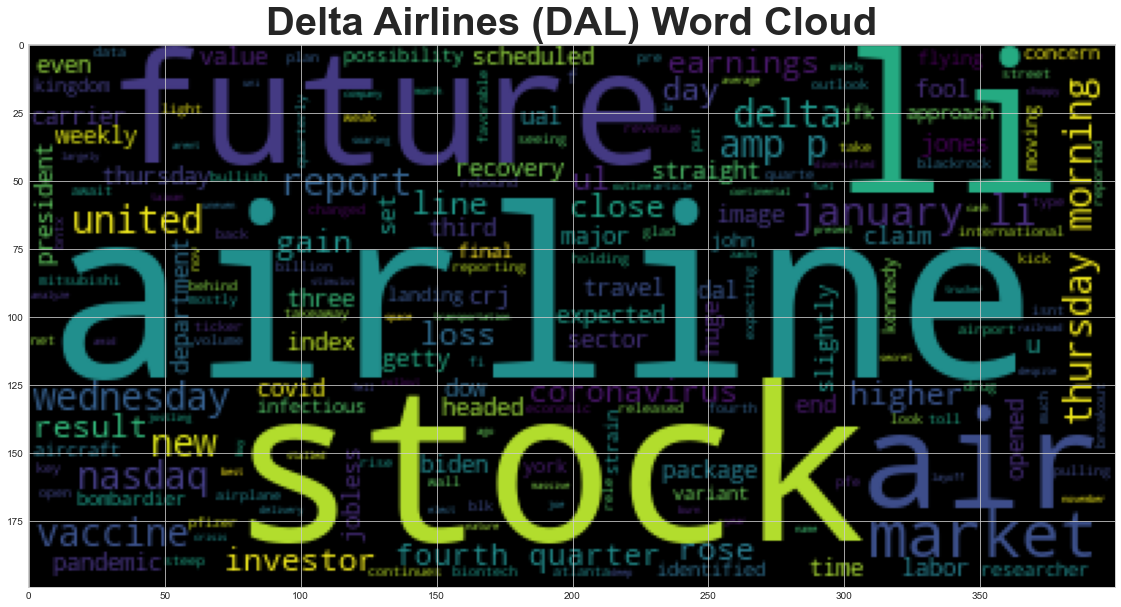

In [22]:
# Generating the Bitcoin word cloud
big_string = '. '.join(clean_delta_text)
wc = WordCloud().generate(big_string)
plt.title("Delta Airlines (DAL) Word Cloud", fontsize=40, loc="center", fontweight="bold")
plt.imshow(wc)

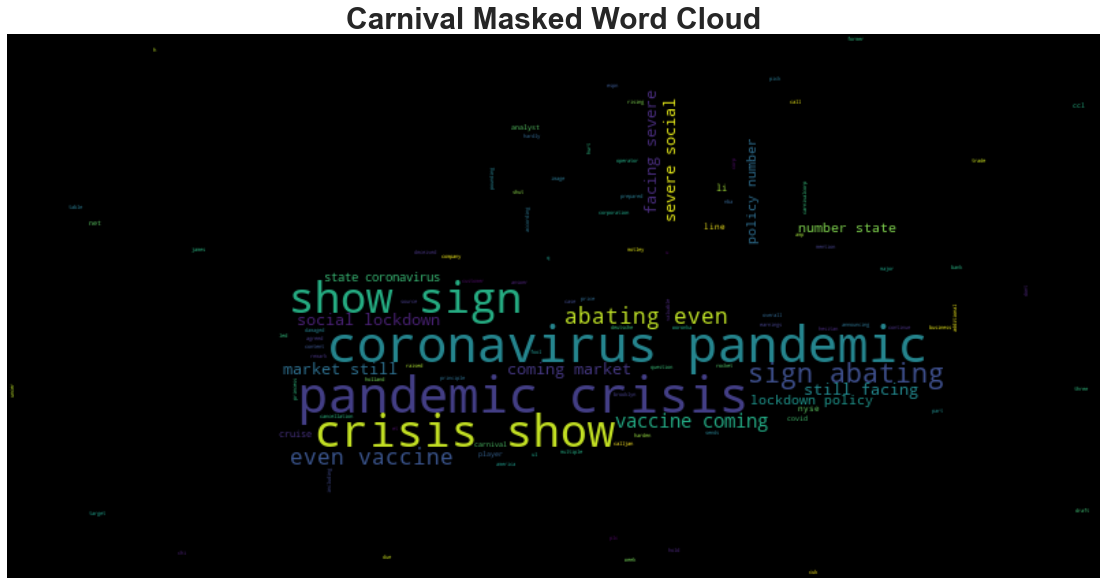

In [23]:
# Generating the Bitcoin word cloud (masked image)
b_mask = np.array(Image.open('images/titanic.jpg'))
b_wordcloud = WordCloud(mask=b_mask).generate(big_string)
plt.figure()
plt.imshow(b_wordcloud, interpolation="bilinear")
plt.title("Carnival Masked Word Cloud", fontsize=30, loc="center", fontweight="bold")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

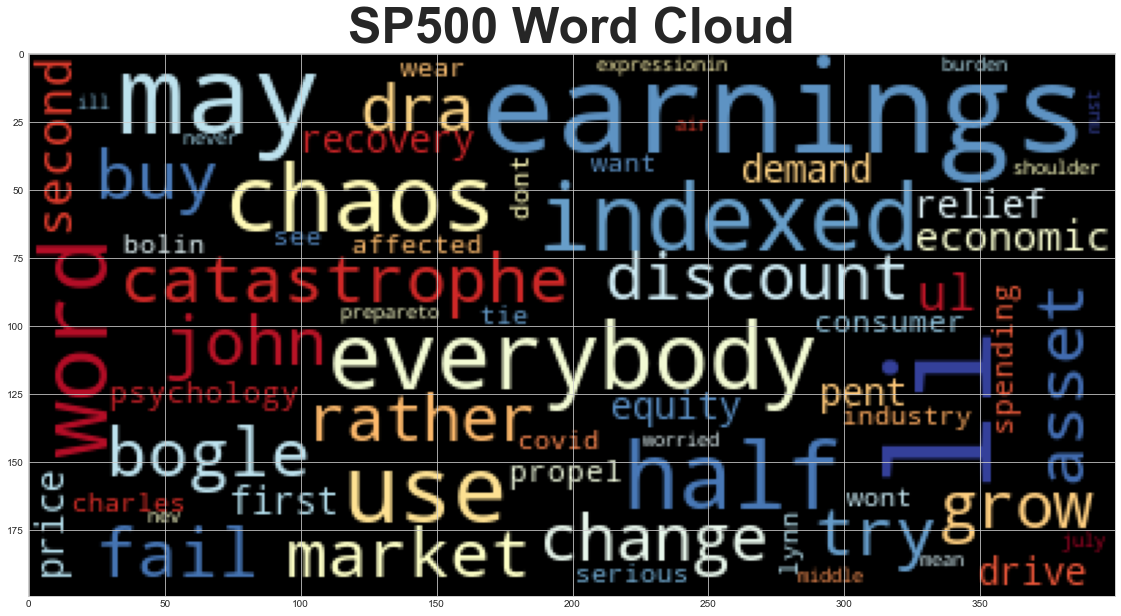

In [24]:
# Generating the Ethereum word cloud
big_string_1 = ' '.join(clean_sp500_text)
wc = WordCloud(colormap="RdYlBu").generate(big_string_1)
plt.title("SP500 Word Cloud", fontsize=50, loc="center", fontweight="bold")
plt.imshow(wc)
plt.imshow(wc)

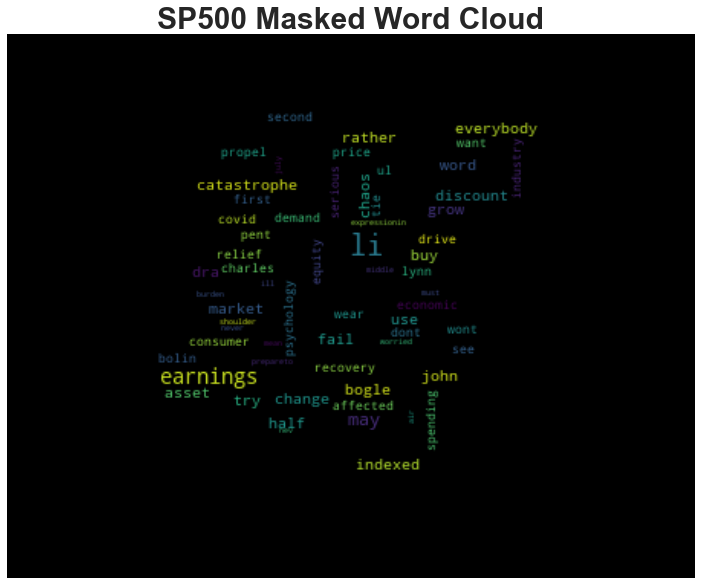

In [25]:
# Generating the Ethereum word cloud (masked image)
e_mask = np.array(Image.open('images/sp500.jpg'))
e_wordcloud = WordCloud(mask=e_mask).generate(big_string_1)
plt.figure()
plt.imshow(e_wordcloud, interpolation="bilinear")
plt.title("SP500 Masked Word Cloud", fontsize=30, loc="center", fontweight="bold")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Loading the spaCy model
nlp = spacy.load('en_core_web_sm') 

# Carnival NER

In [28]:
# Concatenating all of the bitcoin text together
carnival_text

'The coronavirus pandemic crisis shows no signs of abating, even with a vaccine coming on to the markets. Were still facing severe social lockdown policies, with a number of states (such as California… [+8925 chars]Few companies have been as damaged by the COVID-19 pandemic as CarnivalCorp.(NYSE:CCL)\xa0(NYSE:CUK) (not to mention the cruise line business overall). Cruises have been shut down, customers are hesitan… [+2880 chars]Image source: The Motley Fool.\r\nCarnival Corp &amp; plc\xa0(NYSE:CCL)Q4\xa02020 Earnings CallJan 11, 2021, 10:00 a.m. ET\r\nContents:\r\n<ul><li>Prepared Remarks</li><li>Questions and Answers</li><li>Call Part… [+51897 chars]The coronavirus pandemic crisis shows no signs of abating, even with a vaccine coming on to the markets. Were still facing severe social lockdown policies, with a number of states (such as California… [+8925 chars]The coronavirus pandemic crisis shows no signs of abating, even with a vaccine coming on to the markets. Were still facing seve

In [29]:
# Running the NER processor on all of the text
doc = nlp(carnival_text)
# Adding a title to the document
doc.user_data["title"] = "Carnival NER"

In [30]:
# Rendering the visualization
displacy.render(doc, style='ent')

In [31]:
# Listing all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

California GPE
NYSE ORG
CUK PERSON
The Motley Fool ORG
Carnival Corp &amp ORG
NYSE ORG
2020 DATE
11, 2021 DATE
10:00 a.m. TIME
ET PERSON
ul><li PERSON
Answers</li><li PRODUCT
California GPE
California GPE
California GPE
California GPE
California GPE
Houston Rockets ORG
Brooklyn GPE
NBA ORG
James Harden PERSON
California GPE
California GPE
California GPE
California GPE
California GPE
chars]A Deutsche Bank ORG
this week DATE
all three CARDINAL
U.S. GPE
Chis Woronka PERSON
Carnival Corporations ORG
Holland America Line and Princess Cruises ORG
California GPE
California GPE
California GPE
California GPE


# SP500 NER

In [32]:
# Concatenating all of the bitcoin text together
sp500_text

'<ul><li>Second half economic recovery to drive first half equity prices.</li><li>Pent-up demand and relief psychology to propel consumer spending.</li><li>Industries most affected by COVID-19 may see… [+13923 chars]If everybody indexed, the only word you could use is chaos, catastrophe The markets would fail."\r\n- John Bogle, May 2017\r\nTry to buy assets at a discount rather than earnings. Earnings can change dra… [+13278 chars]By Charles Lynn Bolin I wont grow up,I dont want to wear a tie.Or a serious expressionIn the middle of July.And if it means I must prepareTo shoulder burdens with a worried air,Ill never grow up, nev… [+29202 chars]If everybody indexed, the only word you could use is chaos, catastrophe The markets would fail."\r\n- John Bogle, May 2017\r\nTry to buy assets at a discount rather than earnings. Earnings can change dra… [+18820 chars]'

In [33]:
# Running the NER processor on all of the text
doc_1 = nlp(sp500_text)
# Adding a title to the document
doc_1.user_data["title"] = "sp500 NER"

In [34]:
# Rendering the visualization
displacy.render(doc_1, style='ent')

In [35]:
# Listing all Entities
for ent in doc_1.ents:
    print(ent.text, ent.label_)

<ul><li ORG
Second ORDINAL
first ORDINAL
half CARDINAL
John Bogle PERSON
May 2017 DATE
Charles Lynn Bolin PERSON
expressionIn CARDINAL
the middle of July DATE
Ill PERSON
nev PERSON
John Bogle PERSON
May 2017 DATE
